In [1]:
## NOTE: This is Python 3 code.
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt # NOTE: This was tested with matplotlib v. 2.1.0

In [2]:
#https://www.youtube.com/watch?v=Lsue2gEM9D0&ab_channel=StatQuestwithJoshStarmer

In [3]:
# TGA Testing Poisson Distribution


# this randomly selects one value from this range
rd.randrange(1,10)
# lam is lambda, expected amount(avergae number of) people who visit the help desk
# in a time interval(say 10 minutes) let say it is 4.6 people

#np.bincount(np.random.poisson(lam=4.6, size=240))

# suppose we measure the number of customers who visit for every ten minutes during the working hours 
# for 5 days.
# 8 hours(10 mins x 6 x 8 x 5   = 10 minutes x 240)

# I expect 4 to 5 people visit the most

np.bincount(np.random.poisson(lam=4.6, size=240))

# it is correct, 54 times 4 people visited and 42 times 3 people visited

array([ 2, 20, 29, 37, 53, 41, 26, 16,  9,  1,  6], dtype=int64)

In [4]:
#########################
#
# Data Generation Code
#
#########################
## In this example, the data is in a data frame called data.
## Columns are individual samples (i.e. cells)
## Rows are measurements taken for all the samples (i.e. genes)
## Just for the sake of the example, we'll use made up data...
genes = ['gene' + str(i) for i in range(1,101)]
 
wt = ['wt' + str(i) for i in range(1,6)]
ko = ['ko' + str(i) for i in range(1,6)]

# TGA.. awesome way to expand lists and use it as columns
data = pd.DataFrame(columns=[*wt, *ko], index=genes)
for gene in data.index:
    data.loc[gene,'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
    data.loc[gene,'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
 
print(data.head())
print(data.shape) 

       wt1  wt2  wt3  wt4  wt5  ko1  ko2  ko3  ko4  ko5
gene1  106  121  103  124  122  219  214  211  202  208
gene2   49   63   56   61   66  220  230  200  227  225
gene3  473  439  485  467  432  691  656  623  634  689
gene4  382  379  376  355  371  800  769  723  718  754
gene5  875  871  840  868  878  481  510  481  513  482
(100, 10)


In [5]:
## Testing Transpose
# rows represent genes and columns represent cells
data

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,106,121,103,124,122,219,214,211,202,208
gene2,49,63,56,61,66,220,230,200,227,225
gene3,473,439,485,467,432,691,656,623,634,689
gene4,382,379,376,355,371,800,769,723,718,754
gene5,875,871,840,868,878,481,510,481,513,482
gene6,620,641,627,660,650,437,419,426,441,408
gene7,112,131,104,106,112,60,76,74,69,78
gene8,244,279,288,294,248,391,414,376,390,397
gene9,354,323,348,352,319,572,552,531,601,542
gene10,184,168,200,187,183,459,470,429,422,426


In [6]:
# when transposed cells are rows and genes are columns
data.T

,gene1,gene2,gene3,gene4,gene5,gene6,gene7,gene8,gene9,gene10,...,gene91,gene92,gene93,gene94,gene95,gene96,gene97,gene98,gene99,gene100
wt1,106,49,473,382,875,620,112,244,354,184,...,108,321,562,273,835,562,77,696,576,798
wt2,121,63,439,379,871,641,131,279,323,168,...,104,340,579,269,953,573,65,701,590,815
wt3,103,56,485,376,840,627,104,288,348,200,...,107,336,590,257,901,522,63,727,637,831
wt4,124,61,467,355,868,660,106,294,352,187,...,116,329,560,286,857,567,52,719,605,807
wt5,122,66,432,371,878,650,112,248,319,183,...,115,318,560,251,858,553,77,717,606,828
ko1,219,220,691,800,481,437,60,391,572,459,...,909,158,551,64,310,107,391,123,579,61
ko2,214,230,656,769,510,419,76,414,552,470,...,880,159,619,44,299,126,433,151,553,70
ko3,211,200,623,723,481,426,74,376,531,429,...,934,178,601,52,304,137,400,160,631,55
ko4,202,227,634,718,513,441,69,390,601,422,...,888,155,590,42,304,148,374,149,586,58
ko5,208,225,689,754,482,408,78,397,542,426,...,935,165,603,42,320,110,374,149,576,61


In [7]:
# TGA How does scaling work

mydata = pd.DataFrame([[3,2,1],[4,3,1],[0,3,3]],columns=["col" + str(i) for i in range(1,4)])
print("before")
print(mydata)
print("after")
print(preprocessing.scale(mydata))

print("test first value in first column 0.39223227?")
# It took me so much time to figure out the ddof stuff, sciklearn preprocessing.scale calcualtes 
# standard deviation by dividing by n instead of n-1
# dd0f = 0 means divide by n - 0
print((mydata.col1.loc[0] - mydata.col1.mean())/mydata.col1.std(ddof=0))


before
   col1  col2  col3
0     3     2     1
1     4     3     1
2     0     3     3
after
[[ 0.39223227 -1.41421356 -0.70710678]
 [ 0.98058068  0.70710678 -0.70710678]
 [-1.37281295  0.70710678  1.41421356]]
test first value in first column 0.39223227?
0.392232270276368


In [8]:
#########################
#
# Perform PCA on the data
#
#########################

# print("See whether the first value of the first feature is scaled correctly = -0.97201721")
# print((data.T.gene1.loc['wt1'] - data.T.gene1.mean())/data.T.gene1.std(ddof=0))
# print("See whether the first value of the second feature is scaled correctly =-0.8094849")
# print((data.T.gene2.loc['wt1'] - data.T.gene2.mean())/data.T.gene2.std(ddof=0))

# First center and scale the data
scaled_data = preprocessing.scale(data.T)
# create a PCA object
pca = PCA() 
# do the math
pca.fit(scaled_data) 
# get PCA coordinates for scaled_data
pca_data = pca.transform(scaled_data) 
# pca_data is the coordinates of PCA1, PCA2...PCA10
# it is 10 x 10 (10 cells x 10 pcas)

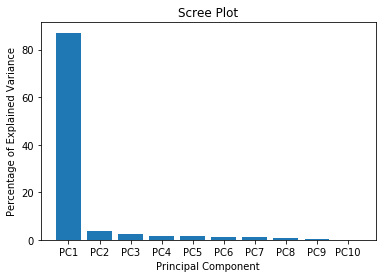

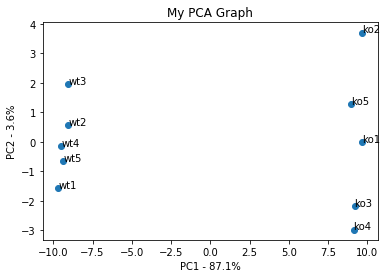

array([[-9.68200947e+00, -1.57500737e+00, -1.88645519e+00,
         4.91051182e-01, -8.91840017e-01,  6.92216832e-01,
        -1.00511490e+00,  1.54733497e+00, -6.20036610e-01,
         1.44328993e-15],
       [-9.05597957e+00,  5.64809365e-01,  5.66727991e-01,
        -1.41544306e+00, -3.39369964e-02,  9.04090600e-01,
         2.57158656e+00,  1.24590691e-01, -4.34470982e-01,
         1.24900090e-15],
       [-9.04777079e+00,  1.95582420e+00,  9.57667549e-01,
        -1.96618137e+00,  1.03275791e+00, -5.25495096e-01,
        -1.82122523e+00, -4.97551830e-01, -4.00974958e-01,
         1.55431223e-15],
       [-9.48231772e+00, -1.37829864e-01, -1.61487591e+00,
         2.23560535e+00,  1.53850045e+00, -4.29639766e-01,
         4.04642642e-01, -1.29415832e+00,  6.32757199e-02,
         3.44169138e-15],
       [-9.37085839e+00, -6.41871741e-01,  2.03463900e+00,
         6.02197491e-01, -1.64582160e+00, -7.29850991e-01,
        -1.00821297e-01,  1.23984397e-01,  1.36637040e+00,
        -1.

In [9]:
#########################
#
# Draw a scree plot and a PCA plot
#
#########################
 
#The following code constructs the Scree plot
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()
 
#the following code makes a fancy looking plot using PC1 and PC2
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)

# TGA this awesome, remember PCA1 contains the projections  of all datapoints(10 of them for this example)
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
 
plt.show()
pca_data

In [10]:
 
#########################
#
# Determine which genes had the biggest influence on PC1
#
#########################
 
## get the name of the top 10 measurements (genes) that contribute
## most to pc1.
## first, get the loading scores
loading_scores = pd.Series(pca.components_[0], index=genes)
# TGA Remember in the 2D example(stats quest) the loading scores are ratios that describe
# the slope of the eigen vector(principal component),
# like 0.97 in gene1 direction, 0.242 in gene2 direction

# In this notebook there are 100 genes threefore each eigen vector is 1 x 100 dimensional vector
# see the loading scores of pca1
#print(loading_scores)
## now sort the loading scores based on their magnitude
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

#TGA: .values returns a numpy array of the indices
# get the names of the top 10 genes
top_10_genes = sorted_loading_scores[0:10].index.values
 
## print the gene names and their scores (and +/- sign)
#print(loading_scores[top_10_genes])<span id="mce_SELREST_start" style="overflow:hidden;line-height:0;"></span>


<img src="https://drive.google.com/uc?export=view&id=11ZrqT-SoVTyj7GXuwI7s2asDACQB8x4U" width="500"/>

In [11]:
sorted_loading_scores[0:10].index

Index(['gene49', 'gene20', 'gene42', 'gene70', 'gene67', 'gene63', 'gene100',
       'gene98', 'gene44', 'gene73'],
      dtype='object')

In [14]:
loading_scores

gene1      0.105992
gene2      0.106597
gene3      0.104126
gene4      0.106580
gene5     -0.106846
gene6     -0.106242
gene7     -0.099757
gene8      0.103643
gene9      0.105263
gene10     0.106578
gene11     0.106915
gene12    -0.101649
gene13     0.106887
gene14     0.041395
gene15     0.106752
gene16     0.106732
gene17    -0.101857
gene18     0.104921
gene19    -0.085509
gene20     0.107067
gene21    -0.106734
gene22    -0.106304
gene23    -0.099079
gene24     0.106698
gene25     0.105114
gene26    -0.106843
gene27    -0.106908
gene28    -0.028149
gene29    -0.103558
gene30    -0.103517
             ...   
gene71     0.043820
gene72    -0.106810
gene73     0.106996
gene74    -0.009555
gene75    -0.104586
gene76     0.106950
gene77    -0.105037
gene78     0.072019
gene79     0.106150
gene80    -0.040298
gene81    -0.102632
gene82    -0.098243
gene83    -0.104307
gene84     0.104624
gene85     0.106607
gene86    -0.103416
gene87     0.106577
gene88    -0.106133
gene89    -0.104699
